In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import re
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [2]:
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq, kmeans, whiten



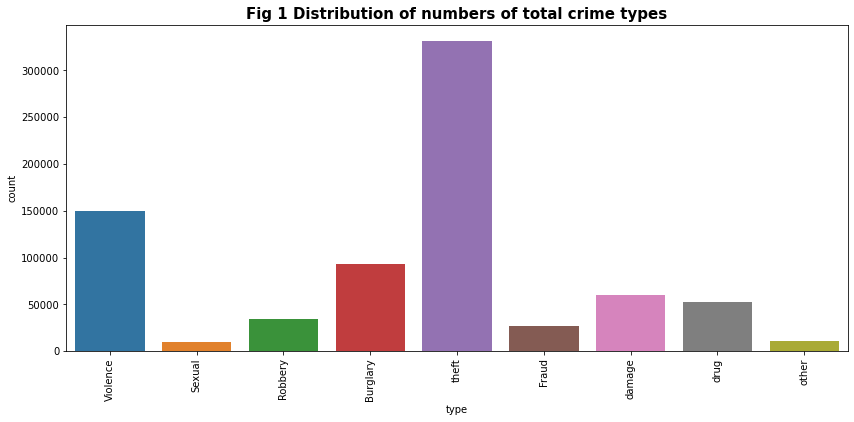

In [3]:
most = pd.read_excel('met-police-recorded-offences-rates-borough (1).xlsx','total')
most = most.set_index('type')
plt.figure(figsize = (14,6))
sns.barplot(y='count', x = most.index,data = most)
plt.xticks(rotation = 90)
plt.title('Fig 1 Distribution of numbers of total crime types', weight='bold', size=15)
plt.savefig('type.png')

In [4]:
df = pd.read_excel('crime_most.xlsx')
df = df.set_index('Borough')


In [5]:
df.head()
df.info

<bound method DataFrame.info of                         Violence_2012_13  theft_2012_13
Borough                                                
Barking and Dagenham                3761           6242
Barnet                              4077          10458
Bexley                              2842           4406
Brent                               6193           8193
Bromley                             4100           8018
Camden                              5030          17767
Croydon                             6521          11103
Ealing                              6939          11306
Enfield                             4340           8572
Greenwich                           5290           8148
Hackney                             5699          13064
Hammersmith and Fulham              4269          10534
Haringey                            4701           9687
Harrow                              2873           4489
Havering                            3317           6454
Hillingdon      

In [6]:
df.describe().T
#df = df.set_index('Borough')


,count,mean,std,min,25%,50%,75%,max
Violence_2012_13,31.0,4593.322581,1463.450429,2052.0,3539.0,4701.0,5732.0,6939.0
theft_2012_13,31.0,9469.451613,3492.307373,4333.0,6962.5,9028.0,11680.5,17767.0


(array([0, 1]), [Text(0, 0, 'Violence_2012_13'), Text(1, 0, 'theft_2012_13')])

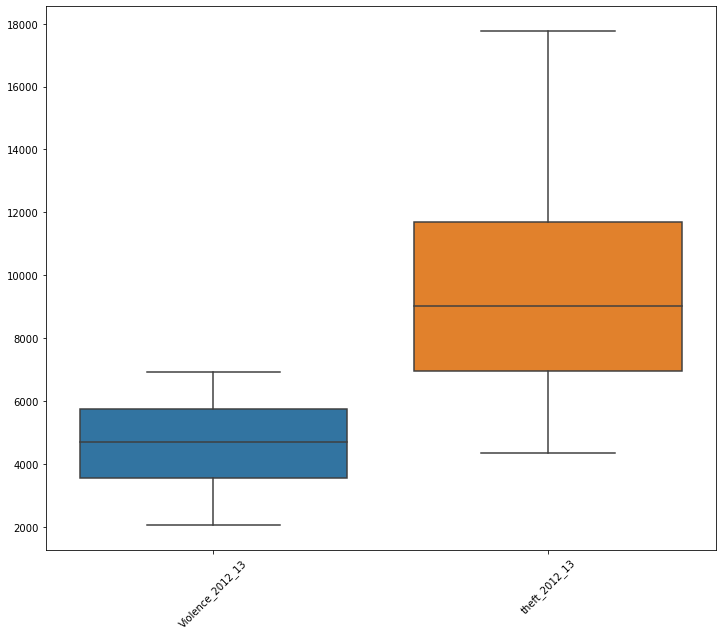

In [7]:
plt.figure(figsize = (12,10))
sns.boxplot(data = df)
plt.xticks(rotation = 45)

In [8]:
 X = df 
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Barking and Dagenham to Wandsworth
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Violence_2012_13  31 non-null     int64
 1   theft_2012_13     31 non-null     int64
dtypes: int64(2)
memory usage: 744.0+ bytes


In [9]:
# Hopkins Test
from pyclustertend import hopkins
hopkins(X,X.shape[0])

0.40250712608591077

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = range (2,9)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    kmeans.fit(X)
    cluster_lables = kmeans.labels_
    silhouette_avg =silhouette_score(X, cluster_lables)
    print(f"For n_clusters = {num_clusters}, the silhouete score is {silhouette_avg}")
# best cluser is 3

For n_clusters = 2, the silhouete score is 0.4796165796497735
For n_clusters = 3, the silhouete score is 0.5197279235769696
For n_clusters = 4, the silhouete score is 0.4823953758912137
For n_clusters = 5, the silhouete score is 0.47294588522553094
For n_clusters = 6, the silhouete score is 0.5181172027874146
For n_clusters = 7, the silhouete score is 0.5022119141669532
For n_clusters = 8, the silhouete score is 0.4961220237251268


In [11]:
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [12]:
model.labels_

array([1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 1, 2, 2, 2], dtype=int32)

In [13]:
clusters = model.labels_
df = pd.DataFrame(df)


In [14]:
df['predicted_clusters'] = clusters
df.to_csv('df.csv')

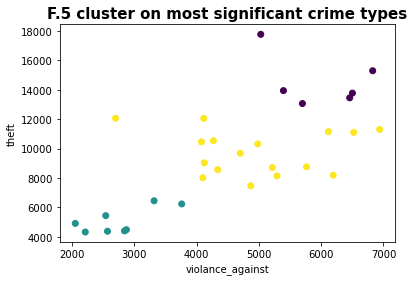

In [15]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],
            c = df.predicted_clusters,cmap = 'viridis')
plt.xlabel('violance_against')
plt.ylabel('theft')
plt.title('F.5 cluster on most significant crime types', weight='bold', size=15)
plt.savefig('cluster.png')

In [16]:
centers = model.cluster_centers_
centers

array([[ 5985.        , 14548.5       ],
       [ 2770.875     ,  5084.25      ],
       [ 4959.76470588,  9740.47058824]])

In [17]:
mapping = {0: "high_both",2: "mid"
          ,1: "low"
          }
df['level'] = df['predicted_clusters'].map(mapping)
#df.to_csv('crime_cluster.csv')
df.reset_index(inplace = True)
df.rename(columns = {'index':'borough'},inplace = True)
df.sort_values('predicted_clusters')


,Borough,Violence_2012_13,theft_2012_13,predicted_clusters,level
23,Newham,6458,13452,0,high_both
20,Lambeth,6827,15292,0,high_both
10,Hackney,5699,13064,0,high_both
5,Camden,5030,17767,0,high_both
17,Islington,5394,13942,0,high_both
26,Southwark,6502,13774,0,high_both
27,Sutton,2569,4385,1,low
25,Richmond upon Thames,2052,4920,1,low
22,Merton,2541,5445,1,low
2,Bexley,2842,4406,1,low


In [18]:

#df.drop('borough',axis = 1)
#high = df.filter('level'=='high_both')
high = df[df['level'] == 'high_both']
low = df.query('level=="low" | level=="mid"')
high


,Borough,Violence_2012_13,theft_2012_13,predicted_clusters,level
5,Camden,5030,17767,0,high_both
10,Hackney,5699,13064,0,high_both
17,Islington,5394,13942,0,high_both
20,Lambeth,6827,15292,0,high_both
23,Newham,6458,13452,0,high_both
26,Southwark,6502,13774,0,high_both


In [19]:
pd.set_option('display.max_colwidth',None)
new = pd.DataFrame(df.groupby("level")['Borough'].unique())
new.to_csv('new.csv')
new.head()

,Borough
level,
high_both,"[Camden, Hackney, Islington, Lambeth, Newham, Southwark]"
low,"[Barking and Dagenham, Bexley, Harrow, Havering, Kingston upon Thames, Merton, Richmond upon Thames, Sutton]"
mid,"[Barnet, Brent, Bromley, Croydon, Ealing, Enfield, Greenwich, Hammersmith and Fulham, Haringey, Hillingdon, Hounslow, Kensington and Chelsea, Lewisham, Redbridge, Tower Hamlets, Waltham Forest, Wandsworth]"


In [20]:
df.groupby('level').mean()

,Violence_2012_13,theft_2012_13,predicted_clusters
level,,,
high_both,5985.000000,14548.500000,0
low,2770.875000,5084.250000,1
mid,4959.764706,9740.470588,2


<AxesSubplot:xlabel='level'>

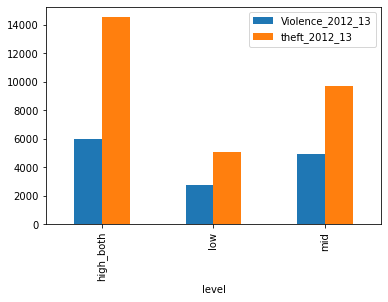

In [21]:
df.groupby('level').mean().iloc[:,:-1].plot(kind='bar')

# ols

In [22]:
# crime data 
colc = ['Code','Borough','2012_13']
crime = pd.read_excel('met-police-recorded-offences-rates-borough (1).xlsx','Crime Rate',
                            usecols = colc)
crime.dropna(inplace = True)
crime.rename(columns = {'2012_13':'crime_rate'}, inplace = True)

crime.head()


,Code,Borough,crime_rate
0,E09000002,Barking and Dagenham,90.470193
1,E09000003,Barnet,69.689743
2,E09000004,Bexley,52.652697
3,E09000005,Brent,86.633191
4,E09000006,Bromley,64.476684


In [23]:
# read in x vairables 


#pollution 
No2 = pd.read_excel('health-impacts-air-pollution-mortality-borough-tables.xls',
                    '6',
                    skiprows = 1,
                    usecols = ['(μg m-3)','Borough'])
No2.rename(columns = {'(μg m-3)':'NO2 PWAC'}, inplace = True)

#blue/green cover 
green_blue = pd.read_excel('green_cover_borough_summary_0.05.xlsx',
                            'borough_green_cover',
                            usecols = ['percent_blue','percent_green','lb_code','lb_name'])


#join
No2join = pd.merge(green_blue,No2,left_on='lb_code',right_on='Borough')
join_y = pd.merge(No2join,crime,left_on='lb_name',right_on='Code')
join_y.drop(columns=['lb_code','lb_name','Code'], inplace=True)

In [24]:
#msoa data 
usemsoa = ['Middle Super Output Area','MSOA Name','Mid-year Estimates 2012, by age;15-19;','Mid-year Estimates 2012, by age;20-24;','Total Median Annual Household Income','Qualifications (2011 Census);No qualifications;','Mid-year Estimate totals;All Ages;2012','Economic Activity (2011 Census);Unemployment Rate;',
           'Economic Activity (2011 Census);Economically active: Total;',
           'Population Density;Persons per hectare (2012);',
          'Qualifications (2011 Census);Highest level of qualification: Level 4 qualifications and above;']
msoa = pd.read_csv('msoa-data.csv',
                  usecols = usemsoa)
code = ['Code','Name','Borough']
boroughcode = pd.read_excel('gla-household-income-estimates (1).xlsx','MSOA11',
                            skiprows = 2,
                           usecols = code)
boroughcode.head()
msoa1 = pd.merge(boroughcode,msoa,left_on='Name',right_on='MSOA Name')
msoa1
msoa1.drop(columns=['Code','Name','Middle Super Output Area','MSOA Name'], inplace=True)
msoa2 = msoa1.groupby(['Borough']).mean().reset_index()
msoa2.head()

,Borough,Mid-year Estimate totals;All Ages;2012,"Mid-year Estimates 2012, by age;15-19;","Mid-year Estimates 2012, by age;20-24;",Population Density;Persons per hectare (2012);,Qualifications (2011 Census);No qualifications;,Qualifications (2011 Census);Highest level of qualification: Level 4 qualifications and above;,Economic Activity (2011 Census);Economically active: Total;,Economic Activity (2011 Census);Unemployment Rate;,Total Median Annual Household Income
0,Barking and Dagenham,8661.818182,582.227273,591.636364,63.159091,1745.272727,1305.227273,3927.454545,10.913636,29166.545455
1,Barnet,8876.975610,501.878049,575.341463,56.353659,1069.097561,2775.975610,4499.585366,6.246341,35435.780488
2,Bexley,8366.821429,555.535714,546.107143,45.260714,1513.071429,1433.785714,4245.142857,6.103571,33307.107143
3,Brent,9254.705882,541.058824,671.911765,84.279412,1403.558824,2429.970588,4823.264706,8.338235,31056.911765
4,Bromley,8052.205128,464.076923,418.076923,35.215385,1142.871795,2110.358974,4135.435897,5.376923,39379.794872


In [25]:
# spatial numbers  
unlicensed = pd.read_excel('unlicensed-restaurants-cafes-borough.xls','Unlicensed Restaurants units')
unlicensed.head()

,Code,Borough,un_licensed_2012
0,E09000001,City of London,140
1,E09000002,Barking and Dagenham,35
2,E09000003,Barnet,180
3,E09000004,Bexley,50
4,E09000005,Brent,95


In [26]:
join = pd.merge(msoa2,unlicensed,left_on='Borough',right_on='Borough')
final_data = pd.merge(join,join_y,left_on='Borough',right_on='Borough_x')
final_data
final_data.rename(columns = {'NO2 PWAC':'NO2_PWAC','Mid-year Estimates 2012, by age;15-19;':'Age_15_19',
                             'Mid-year Estimates 2012, by age;20-24;':'Age_24','Total Median Annual Household Income':'Total_Median_Annual_Household_Income',
                             '% Area of Domestic Buildings':'percent_DomesticBuilding','% Area of Non Domestic Buildings':'percent_Non_Domestic_Buildings',
                             'Mid-year Estimate totals;All Ages;2012':'Age_all','Qualifications (2011 Census);No qualifications;':'No_Qualifications',
                            '% Area of Water':'percent_water','% Area of Greenspace':'percent_greenspace',
                            'Economic Activity (2011 Census);Unemployment Rate;':'Unemployment_Rate','Population Density;Persons per hectare (2012);':'Population_density',
                             'Economic Activity (2011 Census);Economically active: Total;':'total_eco',
                             'Qualifications (2011 Census);Highest level of qualification: Level 4 qualifications and above;':'high_qualification',
                            
                            }, inplace = True)

final_data.head()

,Borough,Age_all,Age_15_19,Age_24,Population_density,No_Qualifications,high_qualification,total_eco,Unemployment_Rate,Total_Median_Annual_Household_Income,Code,un_licensed_2012,percent_green,percent_blue,Borough_x,NO2_PWAC,Borough_y,crime_rate
0,Barking and Dagenham,8661.818182,582.227273,591.636364,63.159091,1745.272727,1305.227273,3927.454545,10.913636,29166.545455,E09000002,35,39.201168,6.098102,Barking and Dagenham,31.9,Barking and Dagenham,90.470193
1,Barnet,8876.975610,501.878049,575.341463,56.353659,1069.097561,2775.975610,4499.585366,6.246341,35435.780488,E09000003,180,57.994299,0.691772,Barnet,33.1,Barnet,69.689743
2,Bexley,8366.821429,555.535714,546.107143,45.260714,1513.071429,1433.785714,4245.142857,6.103571,33307.107143,E09000004,50,42.918334,6.805786,Bexley,30.6,Bexley,52.652697
3,Brent,9254.705882,541.058824,671.911765,84.279412,1403.558824,2429.970588,4823.264706,8.338235,31056.911765,E09000005,95,39.936406,1.031315,Brent,37.3,Brent,86.633191
4,Bromley,8052.205128,464.076923,418.076923,35.215385,1142.871795,2110.358974,4135.435897,5.376923,39379.794872,E09000006,95,68.356138,0.379399,Bromley,29.9,Bromley,64.476684


In [27]:
#final_data['percent_No_Qualification']=final_data['No_Qualifications']/final_data['Age_all'] * 100 
final_data['age_24'] = final_data['Age_15_19'] + final_data['Age_24']
final_data['percent_24']= final_data['age_24']/final_data['Age_all'] * 100 
final_data['percent_qualification'] =final_data['high_qualification']/final_data['Age_all']*100
#final_data['un'] = final_data['Unemployment_Rate']/final_data['total_eco'] * 100
final_data['income']= final_data['Total_Median_Annual_Household_Income']/final_data['Age_all']
final_data['density_unlicensed']= final_data['un_licensed_2012']/final_data['Age_all'].apply(np.log)
final_data.head()

,Borough,Age_all,Age_15_19,Age_24,Population_density,No_Qualifications,high_qualification,total_eco,Unemployment_Rate,Total_Median_Annual_Household_Income,...,percent_blue,Borough_x,NO2_PWAC,Borough_y,crime_rate,age_24,percent_24,percent_qualification,income,density_unlicensed
0,Barking and Dagenham,8661.818182,582.227273,591.636364,63.159091,1745.272727,1305.227273,3927.454545,10.913636,29166.545455,...,6.098102,Barking and Dagenham,31.9,Barking and Dagenham,90.470193,1173.863636,13.552162,15.068745,3.367254,3.860288
1,Barnet,8876.975610,501.878049,575.341463,56.353659,1069.097561,2775.975610,4499.585366,6.246341,35435.780488,...,0.691772,Barnet,33.1,Barnet,69.689743,1077.219512,12.134983,31.271637,3.991875,19.799331
2,Bexley,8366.821429,555.535714,546.107143,45.260714,1513.071429,1433.785714,4245.142857,6.103571,33307.107143,...,6.805786,Bexley,30.6,Bexley,52.652697,1101.642857,13.166803,17.136564,3.980856,5.535854
3,Brent,9254.705882,541.058824,671.911765,84.279412,1403.558824,2429.970588,4823.264706,8.338235,31056.911765,...,1.031315,Brent,37.3,Brent,86.633191,1212.970588,13.106528,26.256594,3.355797,10.401968
4,Bromley,8052.205128,464.076923,418.076923,35.215385,1142.871795,2110.358974,4135.435897,5.376923,39379.794872,...,0.379399,Bromley,29.9,Bromley,64.476684,882.153846,10.955432,26.208460,4.890560,10.562948


In [28]:
test = pd.DataFrame(columns = ['crime_rate','density_unlicensed','percent_green','high_qualification','un','Population_density'])
test[['crime_rate','percent_green','high_qualification']] = final_data[['crime_rate','percent_green','high_qualification']]
test['income'] = final_data['income']
test['percent_24'] = final_data['percent_24']
test['Unemployment_Rate'] = final_data['Unemployment_Rate']
test['percent_qualification'] = final_data['percent_qualification']
test['PWAC'] = final_data['NO2_PWAC']


In [29]:
test.head()
test.drop('high_qualification', axis=1, inplace=True)
test.drop('un', axis=1, inplace=True)


In [30]:
test.describe()

,crime_rate,percent_green,income,percent_24,Unemployment_Rate,percent_qualification,PWAC
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,87.458204,44.002749,4.316632,12.814545,7.217132,30.764642,37.075000
std,24.289900,12.814015,0.798947,1.683686,1.860785,9.781815,6.708589
min,52.652697,5.590892,3.134092,9.244231,3.800000,15.068745,27.000000
25%,68.024568,38.511252,3.769108,12.160660,6.095647,24.273712,32.275000
50%,85.482739,43.412392,4.155052,12.821188,6.973306,29.414919,35.600000
75%,103.304831,53.105374,4.767742,13.622159,8.542560,35.179813,41.450000
max,145.980210,68.356138,6.360251,16.405516,10.913636,60.731194,58.200000


In [31]:
#crime_rate~  percent_green + percent_24 density_unlicensed + Unemployment_Rate+ Population_density + income + percent_qualification

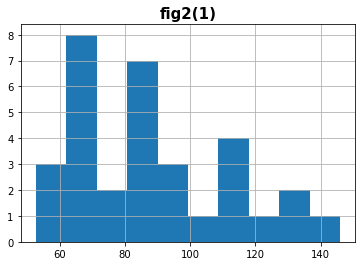

In [32]:
den_hist = pd.DataFrame(test, columns = ['crime_rate'])
den_hist.hist()
plt.title('fig2(1)', weight='bold', size=15)
plt.savefig('normal')

In [33]:
testvif = test
testvif['PWAC'] = final_data['NO2_PWAC']

In [34]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=10):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [35]:
test.head()
test_vif = pd.DataFrame(test,columns = [ 'percent_qualification',
       'percent_24', 'Unemployment_Rate',
        'income','percent_green','PWAC','crime_rate'])

In [36]:
vif = drop_column_using_vif_(test_vif.drop('crime_rate', axis=1))


Dropping: PWAC


In [37]:
model_t = sm.formula.ols('crime_rate~ percent_qualification + percent_24 + Unemployment_Rate + income + percent_green', test).fit()
model_t .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     10.53
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.32e-05
Time:                        22:09:59   Log-Likelihood:                -129.27
No. Observations:                  32   AIC:                             270.5
Df Residuals:                      26   BIC:                             279.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -158.2609     57.692     -2.743      0.011    -276.849     -39.673
percent_qualification     1.8007      0.560      3.218      0.003       0.651       2.951
percent_24                5.5158      2.208      2.498      0.019       0.978      10.054
Unemployment_Rate         9.6557      2.491      3.877      0.001       4.536      14.775
income                    7.9631      6.529      1.220      0.234      -5.458      21.384
percent_green             0.3541      0.337      1.051      0.303      -0.339       1.047
==============================================================================
Omnibus:                        0.690   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.730
Skew:                           0.148   Prob(JB):                        0.694
Kurtosis:                       2.322   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
model_sig = sm.formula.ols('crime_rate~ percent_qualification + percent_24 + Unemployment_Rate ', test).fit()
model_sig .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     16.44
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           2.35e-06
Time:                        22:09:59   Log-Likelihood:                -130.73
No. Observations:                  32   AIC:                             269.5
Df Residuals:                      28   BIC:                             275.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -80.6077     28.520     -2.826      0.009    -139.029     -22.186
percent_qualification     1.7903      0.318      5.633      0.000       1.139       2.441
percent_24                4.7305      2.169      2.181      0.038       0.288       9.173
Unemployment_Rate         7.2561      1.967      3.690      0.001       3.228      11.284
==============================================================================
Omnibus:                        2.313   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.134
Skew:                           0.338   Prob(JB):                        0.567
Kurtosis:                       3.627   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

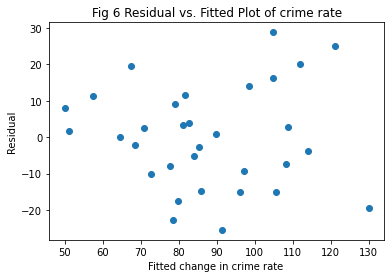

In [39]:
# plot 
plt.scatter(model_t.fittedvalues, model_t.resid)
# adding title and labels
plt.xlabel('Fitted change in crime rate ')
plt.ylabel('Residual')
plt.title('Fig 6 Residual vs. Fitted Plot of crime rate')
plt.savefig('residuals.png')

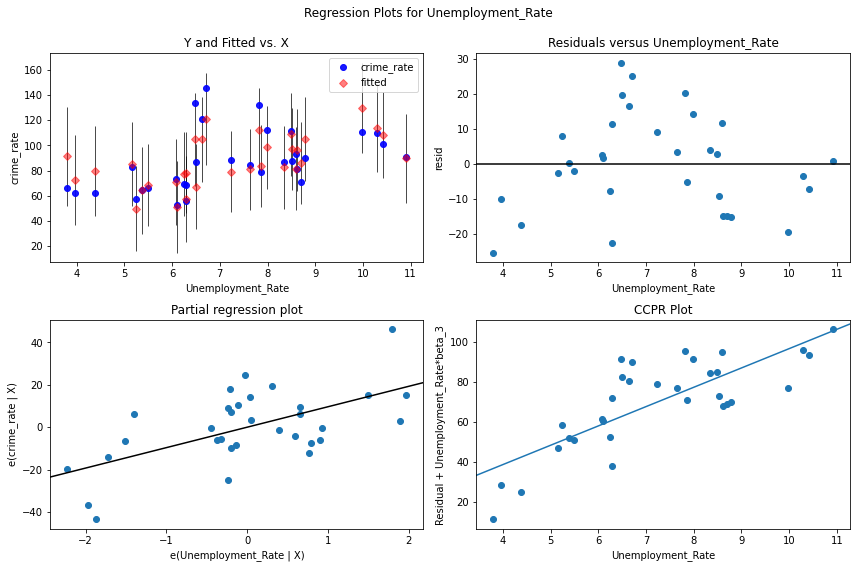

In [40]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_t, 'Unemployment_Rate', fig=fig)

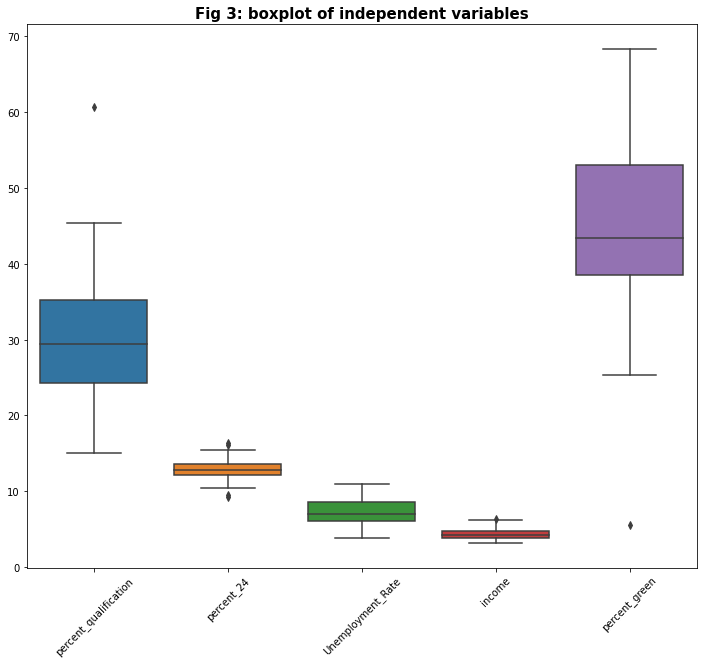

In [41]:
plt.figure(figsize = (12,10))
sns.boxplot(data = vif)
plt.xticks(rotation = 45)
plt.title('Fig 3: boxplot of independent variables', weight='bold', size=15)
plt.savefig('box.png')

In [42]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1 

test.shape

(32, 9)

In [43]:
test1 = test[~((test< (Q1 -1.5* IQR))| (test> (Q3+1.5 * IQR))).any(axis = 1)]
test1.shape

(27, 9)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'crime_rate'),
  Text(1, 0, 'density_unlicensed'),
  Text(2, 0, 'percent_green'),
  Text(3, 0, 'Population_density'),
  Text(4, 0, 'income'),
  Text(5, 0, 'percent_24'),
  Text(6, 0, 'Unemployment_Rate'),
  Text(7, 0, 'percent_qualification'),
  Text(8, 0, 'PWAC')])

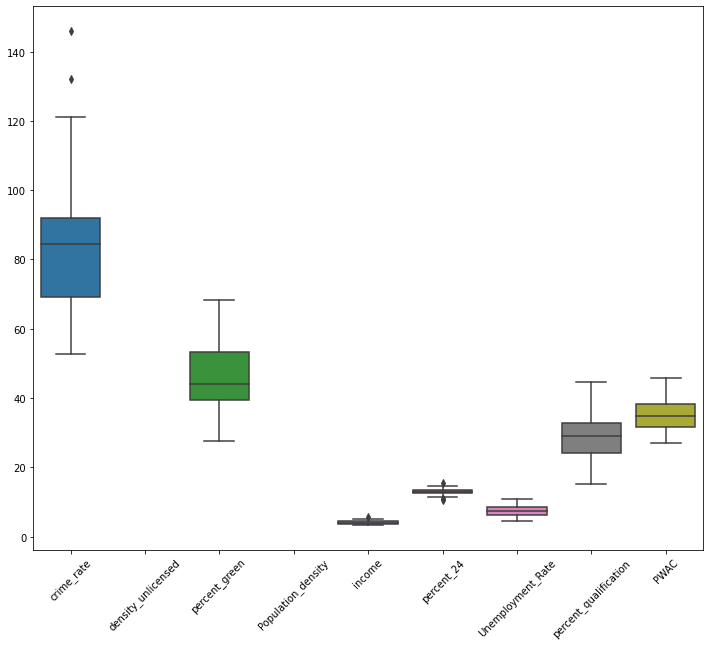

In [44]:
plt.figure(figsize = (12,10))
sns.boxplot(data = test1)
plt.xticks(rotation = 45)

In [45]:
model_drop = sm.formula.ols('crime_rate~ percent_qualification + percent_24 + Unemployment_Rate + income + percent_green', test1).fit()
model_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     14.19
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           3.94e-06
Time:                        22:10:00   Log-Likelihood:                -103.05
No. Observations:                  27   AIC:                             218.1
Df Residuals:                      21   BIC:                             225.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -94.3653     57.271     -1.648      0.114    -213.468      24.737
percent_qualification     1.9028      0.496      3.838      0.001       0.872       2.934
percent_24                6.4819      2.281      2.841      0.010       1.737      11.226
Unemployment_Rate         6.2603      2.352      2.662      0.015       1.369      11.151
income                    1.5556      6.696      0.232      0.819     -12.369      15.481
percent_green            -0.2202      0.376     -0.585      0.565      -1.002       0.562
==============================================================================
Omnibus:                        0.116   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.333
Skew:                          -0.057   Prob(JB):                        0.847
Kurtosis:                       2.468   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
low.head()

,Borough,Violence_2012_13,theft_2012_13,predicted_clusters,level
0,Barking and Dagenham,3761,6242,1,low
1,Barnet,4077,10458,2,mid
2,Bexley,2842,4406,1,low
3,Brent,6193,8193,2,mid
4,Bromley,4100,8018,2,mid


In [47]:
test_r = test
test_r['Borough']=final_data['Borough']
test.head()
low_r = pd.merge(low,test_r,left_on='Borough',right_on='Borough')
model_low = sm.formula.ols('crime_rate ~ percent_qualification + percent_24 + Unemployment_Rate + income + percent_green', low_r).fit()
model_low .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     10.77
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           5.04e-05
Time:                        22:10:00   Log-Likelihood:                -92.770
No. Observations:                  25   AIC:                             197.5
Df Residuals:                      19   BIC:                             204.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.6012     57.334      0.220      0.828    -107.400     132.602
percent_qualification     0.6504      0.550      1.181      0.252      -0.502       1.803
percent_24               -0.4173      2.171     -0.192      0.850      -4.961       4.127
Unemployment_Rate         6.7746      2.186      3.099      0.006       2.199      11.350
income                    8.3097      5.773      1.439      0.166      -3.774      20.394
percent_green            -0.6072      0.337     -1.800      0.088      -1.313       0.099
==============================================================================
Omnibus:                        4.974   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                1.968
Skew:                           0.313   Prob(JB):                        0.374
Kurtosis:                       1.777   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model_safe = sm.formula.ols('crime_rate ~  Unemployment_Rate+ income + percent_green ', low_r).fit()
model_safe .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     17.62
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           6.00e-06
Time:                        22:10:00   Log-Likelihood:                -93.853
No. Observations:                  25   AIC:                             195.7
Df Residuals:                      21   BIC:                             200.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.4001     41.127      0.399      0.694     -69.129     101.929
Unemployment_Rate     6.0578      2.092      2.895      0.009       1.706      10.409
income               13.2845      4.319      3.076      0.006       4.302      22.267
percent_green        -0.7544      0.287     -2.627      0.016      -1.352      -0.157
==============================================================================
Omnibus:                        1.263   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.882
Skew:                           0.047   Prob(JB):                        0.643
Kurtosis:                       2.085   Cond. No.                         903.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""